# Lecture Notebook 1: Creating a Demand Curve

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
        Akhil Venkatesh <br>
</table>

In [186]:
!pip install oauth2client
import pandas as pd
import gspread
import os
import json
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
from datascience import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

For our iteration of this class in August of 2022, we asked students in the room to make a bid representing how much they would be willing to pay for different goods: Masks, Burritos, iPhones, and GreekTix. We attempted to then derive a demand curve based on these results.

### Let's load in a few demand curves based on this survey taken from class! Here's how the survey looked:
https://docs.google.com/forms/d/e/1FAIpQLScVfl0IiCoFQwrKsHrICKAJsA1mZn7GZCjQC_97YRnqXJCP2A/viewform


### You can find the survey responses here:
https://docs.google.com/spreadsheets/d/1Izl5h_PXIph-Dk4PrsZCBWq4KQFiIoA_xh2odVo3b9A/edit#gid=1309761632

In [187]:
# This cell loads in the data from the google form and saves it to a table called demand_table - don't worry about the code!
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_dict(json.loads(os.environ['GOOGLE_SHEETS_READONLY_KEY']), scope)
gc = gspread.authorize(creds)

url = "https://docs.google.com/spreadsheets/d/1Izl5h_PXIph-Dk4PrsZCBWq4KQFiIoA_xh2odVo3b9A/edit?usp=sharing"

sheet = gc.open_by_url(url)
ws = sheet.worksheet('Form Responses 1')
df = pd.DataFrame(ws.get_all_records())

demand_table = Table.from_df(df)
demand_table = demand_table.drop('Timestamp')
demand_table

Masks,Burrito,GreekTix,iPhone
1,10,100,1000
0.25,5,25,1500
1,15,100,1000
1,12.5,100,1000
1,7.5,100,1250
1.5,7.5,50,1000
1.5,7.5,150,750
1,10,100,1500
0.25,5,100,1500
1.25,10,75,1250


Let's try graphing all our different responses!

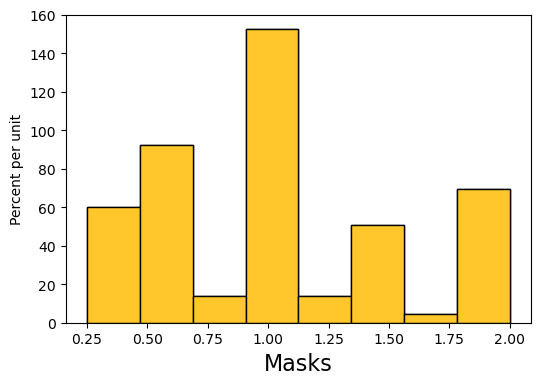

In [188]:
demand_table.hist("Masks", bins = 8, left_end = min(demand_table.column("Masks")), 
                  right_end = max(demand_table.column("Masks")))


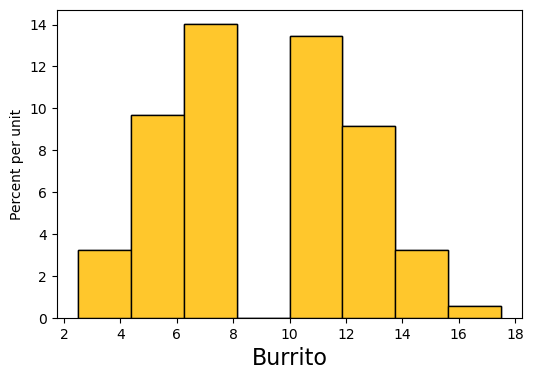

In [189]:
demand_table.hist("Burrito", bins = 8, left_end = min(demand_table.column("Burrito")), 
                  right_end = max(demand_table.column("Burrito")))

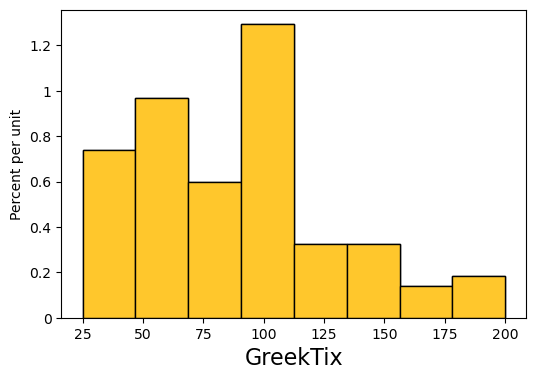

In [190]:
demand_table.hist("GreekTix", bins = 8, left_end = min(demand_table.column("GreekTix")), 
                  right_end = max(demand_table.column("GreekTix")))


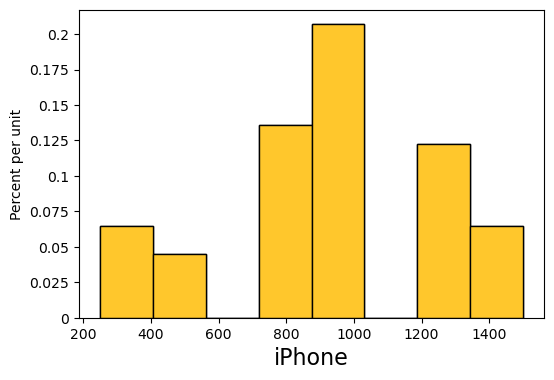

In [191]:
demand_table.hist("iPhone", bins = 8, left_end = min(demand_table.column("iPhone")), 
                  right_end = max(demand_table.column("iPhone")))


Let's start by looking at the demand for greek theater tickets. How many people would buy greek theater tickets at a given price? Let's assume that a person would be willing to buy the good at a price less than their bid price.  

In [192]:
# This is a column of bid values for greek theater tickets that have been inputted. 
greektix = demand_table.select('GreekTix')
greektix

GreekTix
100
25
100
100
100
50
150
100
100
75


In [193]:
#Let's create a table summarizing the quantity of bid values! First we'll need to define our two columns!
prices = np.array([2.50, 5.00, 7.50, 10.00, 12.50, 15.00, 17.50, 20.00])
quantities = np.flip(np.cumsum(np.flip(greektix.group("GreekTix").column(1))))

In case you're wondering how we came up with the quantities values: We perform np.flip first so that we can cumulatively sum up the quantities. We then perform np.cumsum to calculate the cumulative sums. Because np.cumsum reverts the order of the array to ascending order, we perform np.flip again to get the array in descending order (that is, from 99 to 4).


In [194]:
#Now we can use pd.DataFrame to actually create the columns with their respective labels and values!
greektix_demand = pd.DataFrame({'Price': prices, 'Quantity': quantities})
greektix_demand

,Price,Quantity
0,2.5,99
1,5.0,83
2,7.5,62
3,10.0,49
4,12.5,21
5,15.0,14
6,17.5,7
7,20.0,4


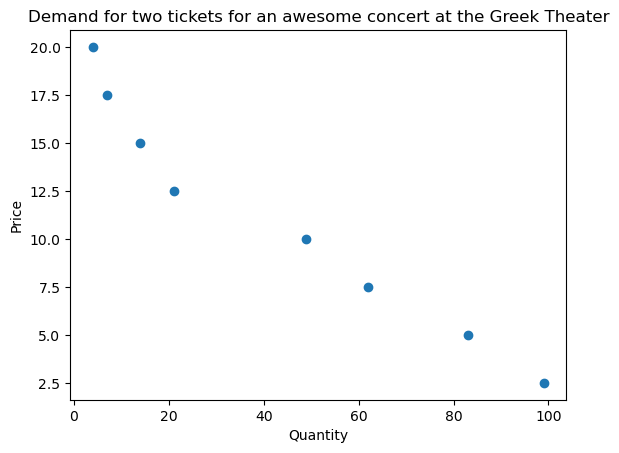

In [195]:
# Let's graph our results
plt.scatter(greektix_demand["Quantity"], greektix_demand["Price"])
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for two tickets for an awesome concert at the Greek Theater');

Now let's find the slope and intercept of the line of best fit. The cell below defines some functions that you'll learn about in the later portions of Data 8.

In [196]:
std_units = lambda a: (a - np.mean(a)) / np.std(a)
corr = lambda x, y: np.mean(std_units(x) * std_units(y))
slope = lambda x, y: corr(x, y) * np.std(y) / np.std(x)
intercept = lambda x, y: np.mean(y) - slope(x, y) * np.mean(x)

In [197]:
slope(greektix_demand["Quantity"], greektix_demand["Price"])

-0.16407145264577014

In [198]:
intercept(greektix_demand["Quantity"], greektix_demand["Price"])

18.20252780586451

Feel free to explore this in your own time: Let's create demand curves for our other products as well!

In [199]:
#Gourmet Burrito
prices_burrito = pd.DataFrame({'price':[2.50, 5, 7.50, 10, 12.5, 15,17.5,20]})

burritos = demand_table.select('Burrito')
burritosByPrice = burritos.group("Burrito")
bbp = burritosByPrice.to_df()
gb = (
    prices_burrito
    .merge(bbp, left_on='price', how='left', right_on='Burrito')
    .fillna(0).drop('Burrito', axis=1)
)

burritos_table = Table.from_df(gb)
Q_demand_burrito = np.flip(np.cumsum(np.flip(burritos_table.group("price", sum).column(1))))

gb_demand = Table().with_columns(
    'price', prices_burrito.price, 
    'quantity', Q_demand_burrito
)

burrito_slope = slope(gb_demand["quantity"], gb_demand["price"])
burrito_intercept = intercept(gb_demand["quantity"], gb_demand["price"])
print("Slope: " + str(burrito_slope))
print("Intercept: " +  str(burrito_intercept))

Slope: -0.14439150785690408
Intercept: 17.531030591775327


In [200]:
#Masks
prices_masks = pd.DataFrame({'price':[0.25, 0.50, .75, 1.00, 1.25, 1.50, 1.75, 2.00]})

masks = demand_table.select('Masks')
masksByPrice = masks.group("Masks")
tbp = masksByPrice.to_df()
ms = (
    prices_masks
    .merge(tbp, left_on='price', how='left', right_on='Masks')
    .fillna(0).drop('Masks', axis=1)
)

masks_table = Table.from_df(ms)
Q_demand_masks = np.flip(np.cumsum(np.flip(masks_table.group("price", sum).column(1))))

ms_demand = Table().with_columns(
    'price', prices_masks.price, 
    'quantity', Q_demand_masks
)

masks_slope = slope(ms_demand["quantity"], ms_demand["price"])
masks_intercept = intercept(ms_demand["quantity"], ms_demand["price"])
print("Slope: " + str(masks_slope))
print("Intercept: " +  str(masks_intercept))

Slope: -0.018300477696292807
Intercept: 2.0445990042387137


In [201]:
#Iphone 14
prices_iphone = pd.DataFrame({'price':[250, 500, 750, 1000, 1250, 1500,1750,2000, 2250, 2500, 2750, 3000]})

iphones = demand_table.select('iPhone')
iphonesByPrice = iphones.group("iPhone")
ibp = iphonesByPrice.to_df()
iphone14 = (
    prices_iphone
    .merge(ibp, left_on='price', how='left', right_on="iPhone")
    .fillna(0).drop("iPhone", axis=1)
)

iphones_table = Table.from_df(iphone14)
Q_demand_iphones = np.flip(np.cumsum(np.flip(iphones_table.group("price", sum).column(1))))

iphone14_demand = Table().with_columns(
    'price', prices_iphone.price, 
    'quantity', Q_demand_iphones
)

iphones_slope = slope(iphone14_demand["quantity"], iphone14_demand["price"])
iphones_intercept = intercept(iphone14_demand["quantity"], iphone14_demand["price"])
print("Slope: " + str(iphones_slope))
print("Intercept: " +  str(iphones_intercept))

Slope: -20.240494171265
Intercept: 2249.081903614004


Comparing the demand curves for our four products, what similarities or differences do you notice? In particular, think about what the slopes of the curves might reveal to us about consumer preferences. 

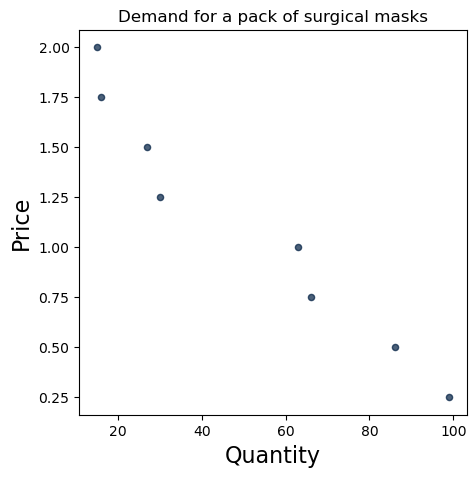

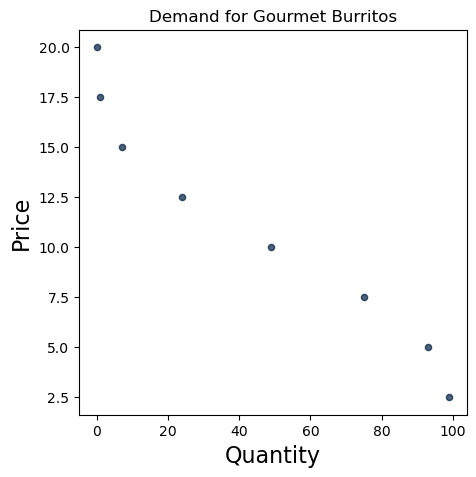

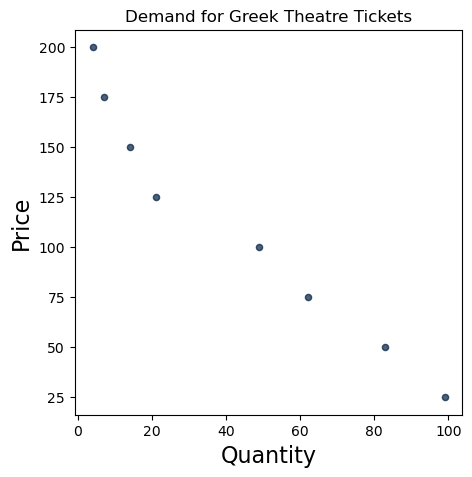

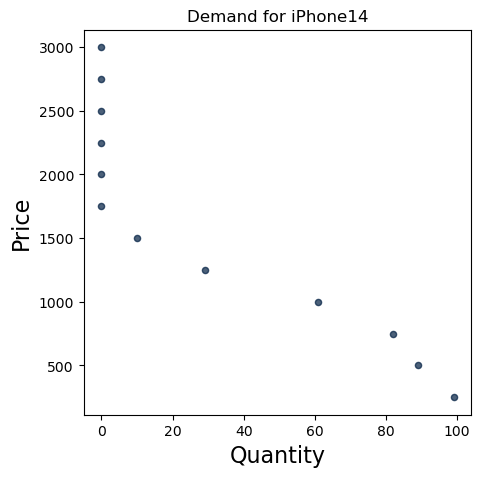

In [202]:
masks_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for a pack of surgical masks');

gb_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Gourmet Burritos');

gt_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Greek Theatre Tickets');

iphone14_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for iPhone14');